In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython import display

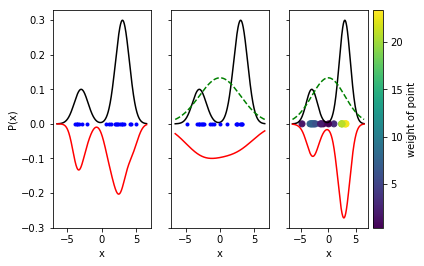

In [2]:
display.Image("./kernel.png")

In [3]:
def gaussian(x,mu,sig):
    return 1/(np.exp(np.power(x - mu,2)/(2.*np.power(sig,2)))*np.sqrt(2*np.pi)*sig)

## definition of two distributions (pdf is our P(x), sum of two gaussians while pdf0 is a simple gaussian our P'(x)) that are then used to modify the built in function _pdf of rv_continuous

In [4]:
def pdf(x):
    """A simple Gaussian Mixture Model"""
    return 0.3*gaussian(x,-3,1)+0.7*gaussian(x,3,1)
def pdf0(x):
    """A simple Gaussian"""
    return gaussian(x,0,3)

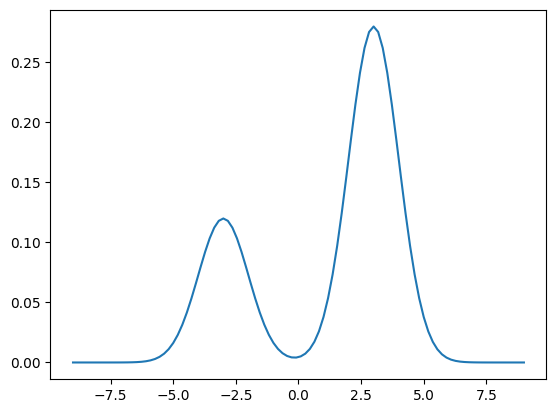

In [5]:
# just a check
x = np.linspace(-9,9,100)
plt.plot(x,pdf(x));

## we define the classes my_pdf and my_pdf0 as modifications to the standard pdf of rv_continuous

In [6]:
class my_pdf(st.rv_continuous):
    def _pdf(self,x):
        return pdf(x)  # Normalized over its range, in the example below [-9,9]
class my_pdf0(st.rv_continuous):
    def _pdf(self,x):
        return pdf0(x)  # Normalized over its range, in the example below [-9,9]    

my_cv = my_pdf(a=-9, b=9, name='my_pdf')
my_cv0 = my_pdf0(a=-9, b=9, name='my_pdf0')

In [7]:
def random_samples(dist,npoints):
    return np.asarray([ dist.rvs() for i in range(1,npoints) ])

## samples and samples0 are  sets of points randomly selected from P(x) and P'(x) respectively 

In [8]:
samples=random_samples(my_cv,30)
samples0=random_samples(my_cv0,30)

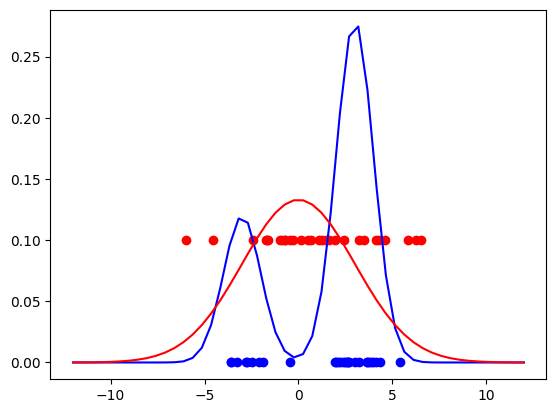

In [11]:
#plt.hist(samples,bins=200,density=True);
y=np.zeros(len(samples))
y1=y+0.1
plt.scatter(samples,y,c='blue')
plt.scatter(samples0,y1,c='red')
x = np.linspace(-12,12)
plt.plot(x,pdf(x),c='blue')
plt.plot(x,pdf0(x),c='red')

## reconstruction of the distributions with a gaussian kernel (gaussian_kde) withough weights does not produce P(x) if we use sample0

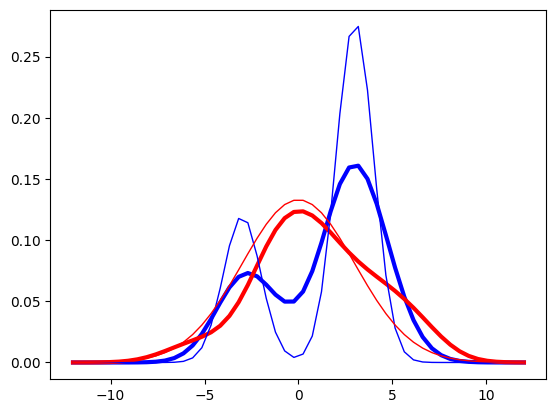

In [12]:
#kernel = st.gaussian_kde(samples,bw_method=0.5)
kernel = st.gaussian_kde(samples)
kernel0 = st.gaussian_kde(samples0)
plt.plot(x,kernel(x),c='blue',lw=3)
plt.plot(x,kernel0(x),c='red',lw=3)
plt.plot(x,pdf(x),c='blue',lw=1)
plt.plot(x,pdf0(x),c='red',lw=1)

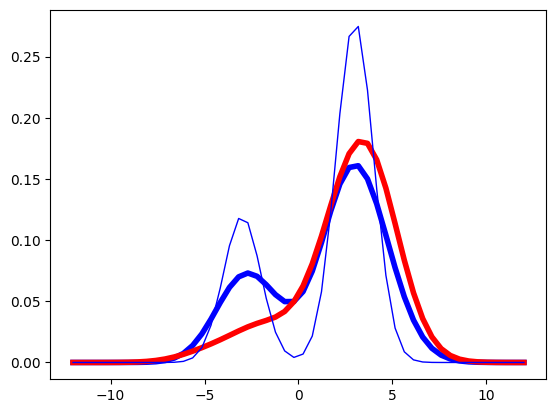

In [13]:
ws=np.ones((len(samples0)))
kernel = st.gaussian_kde(samples)
for i in range(len(samples0)):
    ws[i]=pdf(samples0[i])/pdf0(samples0[i])
    #ws=ws/np.sum(ws)
kernel_w = st.gaussian_kde(samples0,weights=ws)
plt.plot(x,kernel(x),c='blue',lw=4)
plt.plot(x,kernel_w(x),c='red',lw=4)
plt.plot(x,pdf(x),c='blue',lw=1)